<a href="https://colab.research.google.com/github/Rmccree01/MIS515/blob/main/Project_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/chess_games.csv")

# Specify the columns to remove
columns_to_remove = ["game_id", "victory_status", "time_increment", "white_id", "black_id", "moves"]

# Drop the specified columns
data = data.drop(columns=columns_to_remove)

# Test for null values in each column after dropping columns
print("Null counts for each column after dropping columns:")
print(data.isnull().sum())

# Reassigning nulls in 'opening_response' with 'No opening response'
data['opening_response'].fillna("No Opening Response", inplace=True)

# Reassigning nulls in 'opening_variation' with 'No opening variation'
data['opening_variation'].fillna("No Opening Variation", inplace=True)

# Overview of the data
print("\nData Header:")
print(data.head())

# Retest null values after modifications
print("\nNull counts for each column after modifications:")
print(data.isnull().sum())

# Export cleaned data as csv for later analysis
output_file_path = "/content/cleaned_chess_games.csv"
data.to_csv(output_file_path, index=False)

Null counts for each column after dropping columns:
rated                    0
turns                    0
winner                   0
white_rating             0
black_rating             0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

Data Header:
   rated  turns winner  white_rating  black_rating opening_code  \
0  False     13  White          1500          1191          D10   
1   True     16  Black          1322          1261          B00   
2   True     61  White          1496          1500          C20   
3   True     61  White          1439          1454          D02   
4   True     95  White          1523          1469          C41   

   opening_moves                        opening_fullname    opening_shortname  \
0              5        Slav Defense: Exchange Variation         Slav Defense   
1              4  Nimzowitsch Defense: Kennedy Variation  N

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file
clean_data = pd.read_csv("/content/cleaned_chess_games.csv")

# Selecting the features and target variable
X = clean_data[["turns", "white_rating", "black_rating", "opening_shortname", "opening_variation"]]
y = clean_data["winner"]

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=150, random_state=42)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set for Gradient Boosting
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Accuracy:", accuracy_gb)

# Print classification report for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", accuracy_lr)

# Print classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Random Forest Accuracy: 0.6488035892323031

Random Forest Classification Report:
              precision    recall  f1-score   support

       Black       0.64      0.63      0.63      1816
        Draw       0.50      0.09      0.16       192
       White       0.66      0.72      0.69      2004

    accuracy                           0.65      4012
   macro avg       0.60      0.48      0.49      4012
weighted avg       0.64      0.65      0.64      4012


Gradient Boosting Accuracy: 0.688185443668993

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       Black       0.69      0.66      0.68      1816
        Draw       0.27      0.02      0.04       192
       White       0.69      0.78      0.73      2004

    accuracy                           0.69      4012
   macro avg       0.55      0.49      0.48      4012
weighted avg       0.67      0.69      0.67      4012



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.6211365902293121

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Black       0.61      0.58      0.60      1816
        Draw       1.00      0.01      0.02       192
       White       0.63      0.72      0.67      2004

    accuracy                           0.62      4012
   macro avg       0.75      0.44      0.43      4012
weighted avg       0.64      0.62      0.61      4012



In [ ]:
# Calculate accuracies
accuracy_rf = accuracy_score(y_test, rf_classifier.predict(X_test)) * 100
accuracy_gb = accuracy_score(y_test, gb_classifier.predict(X_test)) * 100
accuracy_lr = accuracy_score(y_test, lr_classifier.predict(X_test)) * 100

# Print accuracies
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf))
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy_gb))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr))

Random Forest Accuracy: 64.88%
Gradient Boosting Accuracy: 68.82%
Logistic Regression Accuracy: 62.11%


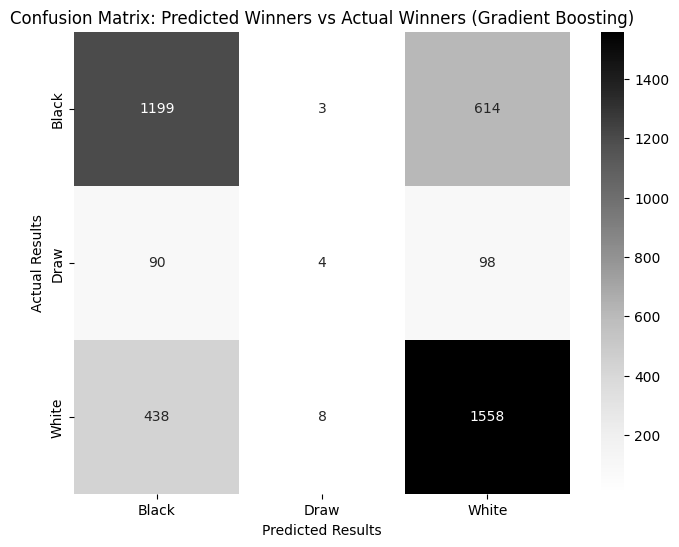

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute unique values in y_true and y_pred_gb
unique_labels_gb = sorted(y_test.unique())

# Compute the confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=unique_labels_gb)

# Plot the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greys', xticklabels=unique_labels_gb, yticklabels=unique_labels_gb)
plt.title('Confusion Matrix: Predicted Winners vs Actual Winners (Gradient Boosting)')
plt.xlabel('Predicted Results')
plt.ylabel('Actual Results')
plt.show()


In [ ]:
# Calculate total number of predictions
total_predictions_gb = sum(sum(cm_gb))

# Calculate percentage of incorrect predictions
percentage_incorrect_gb = (incorrect_predictions_gb / total_predictions_gb) * 100

# Print the number and percentage of incorrect predictions
print("Incorrect Predictions (Gradient Boosting):", incorrect_predictions_gb)
print("Percentage of Incorrect Predictions (Gradient Boosting): {:.2f}%".format(percentage_incorrect_gb))


Incorrect Predictions (Gradient Boosting): 1251
Percentage of Incorrect Predictions (Gradient Boosting): 31.18%


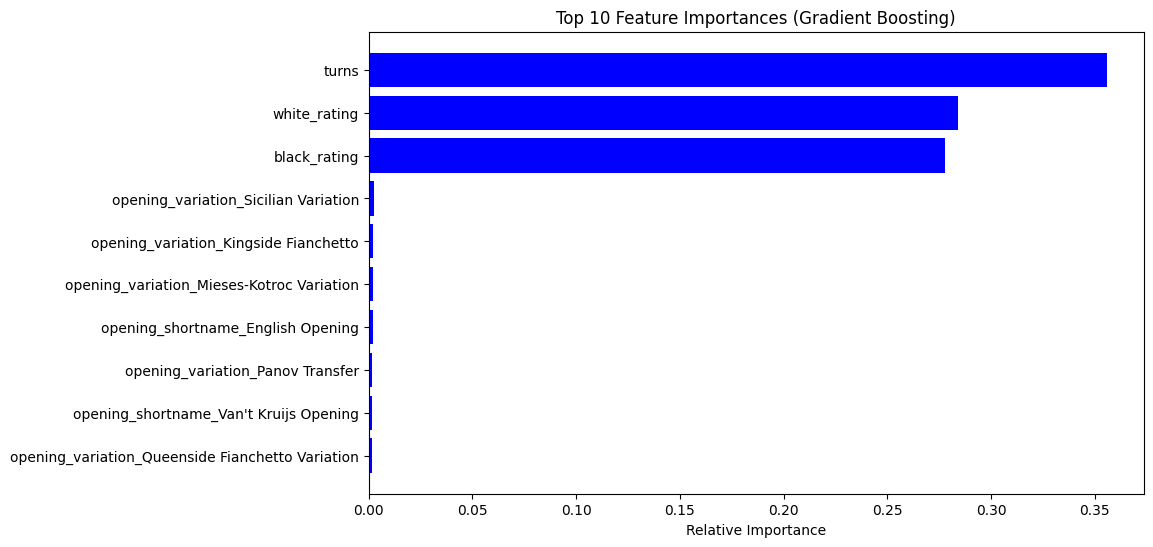

In [ ]:
# Number of top features to display
top_n_features = 10

# Get the top N features and importances
top_features = features[indices][-top_n_features:]
top_importances = importances[indices][-top_n_features:]

# Plot feature importances for the top N features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, color='b', align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Relative Importance')
plt.title(f'Top {top_n_features} Feature Importances (Gradient Boosting)')
plt.show()


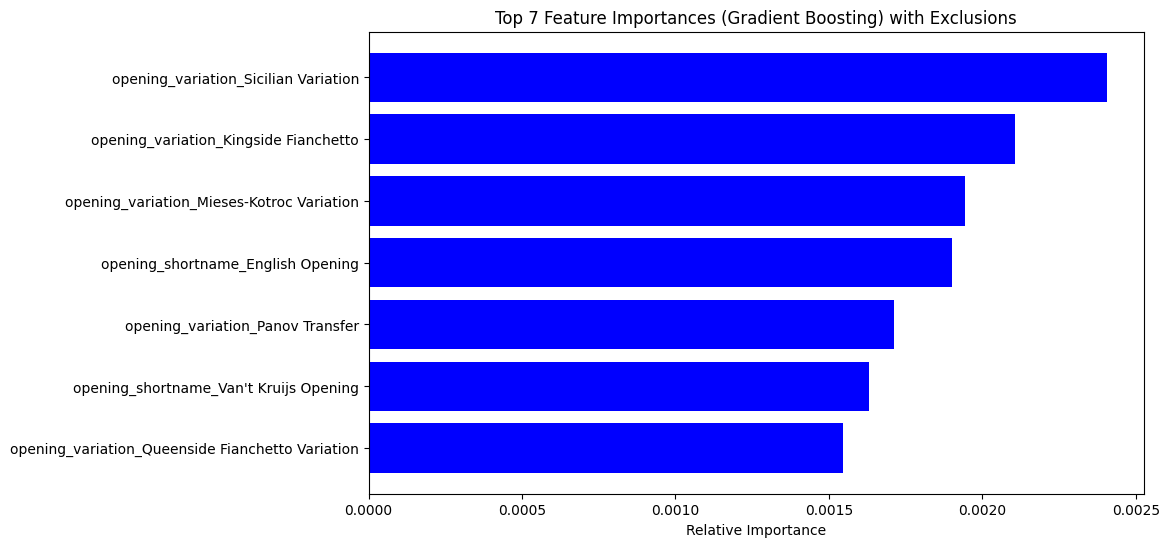

In [ ]:
# Number of top features to display
top_n_features = 10

# Filter out "turns", "white_rating", and "black_rating" from the top features
filtered_top_features = [f for f in top_features if f not in ["turns", "white_rating", "black_rating"]]
filtered_top_importances = [imp for feat, imp in zip(top_features, top_importances) if feat not in ["turns", "white_rating", "black_rating"]]

# Plot feature importances for the top N features (excluding "turns", "white_rating", and "black_rating")
plt.figure(figsize=(10, 6))
plt.barh(range(len(filtered_top_features)), filtered_top_importances, color='b', align='center')
plt.yticks(range(len(filtered_top_features)), filtered_top_features)
plt.xlabel('Relative Importance')
plt.title(f'Top {len(filtered_top_features)} Feature Importances (Gradient Boosting) with Exclusions')
plt.show()


In [ ]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv("/content/cleaned_chess_games.csv")

# Step 2: Count the frequency of each opening code
opening_code_counts = data['opening_code'].value_counts()

# Step 3: Find the two most popular opening codes
most_popular_openings = opening_code_counts.head(10)

# Step 4: Print the results
print("The most popular opening codes are:")
print(most_popular_openings)


The most popular opening codes are:
opening_code
A00    1007
C00     844
D00     739
B01     716
C41     691
C20     675
A40     618
B00     611
B20     567
C50     538
Name: count, dtype: int64


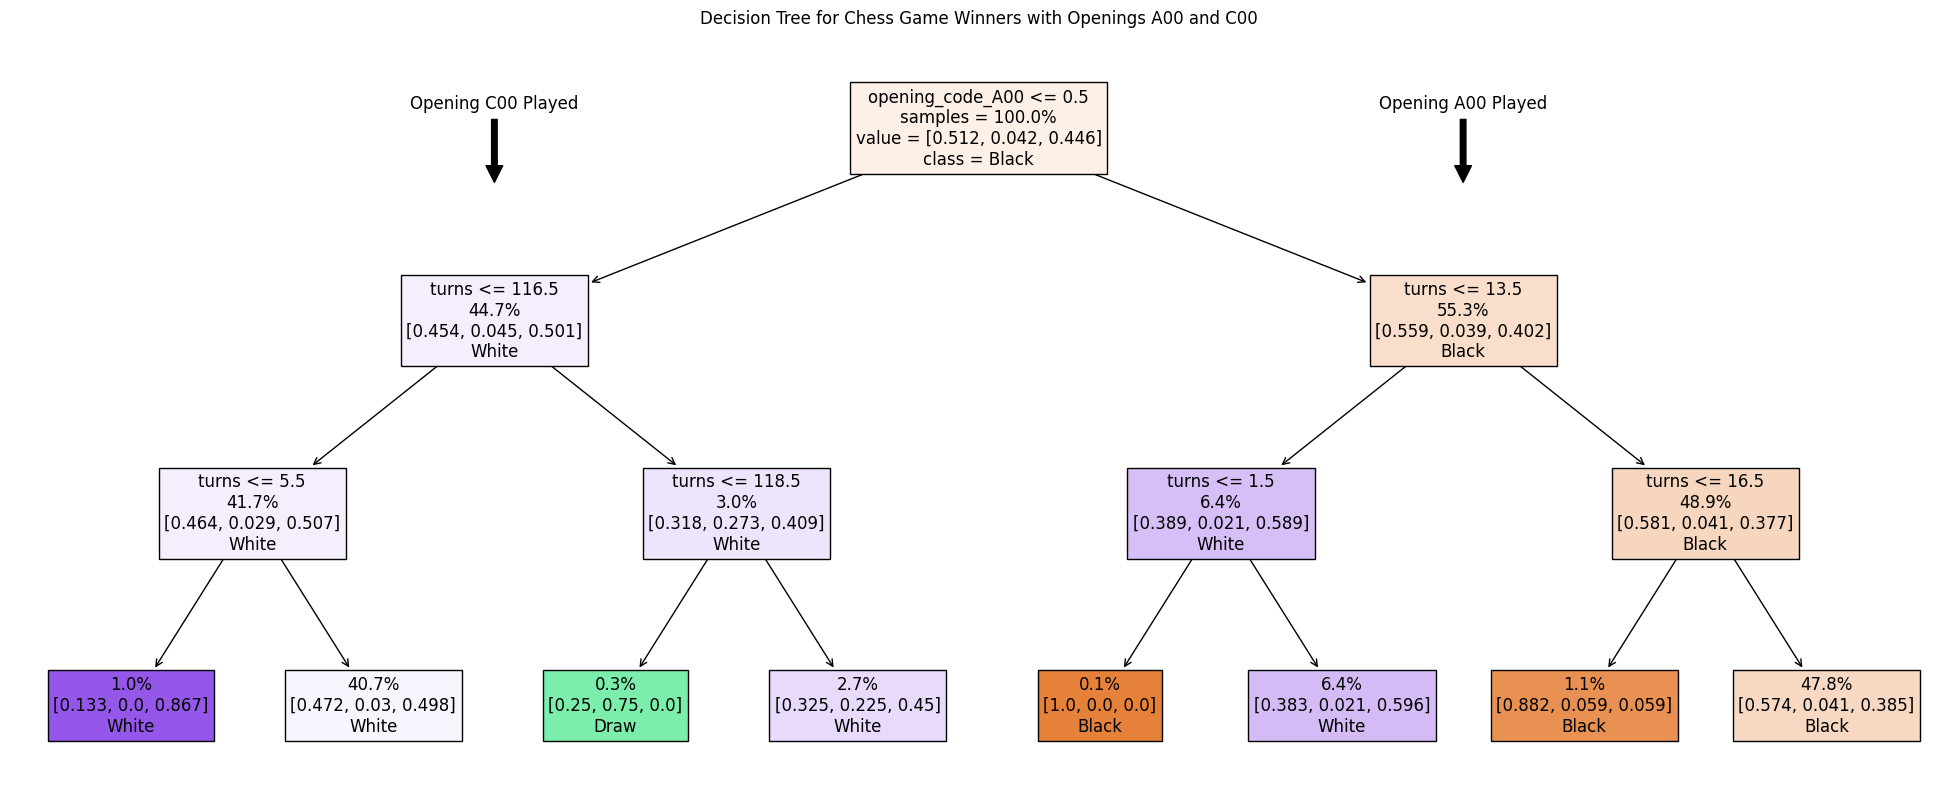

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/cleaned_chess_games.csv")

# Filter for games using the A00 and C00 opening codes
filtered_data = data[data['opening_code'].isin(['A00', 'C00'])]

# Select features and the target variable
features = filtered_data[['turns', 'opening_code']]  # Consider adding more features if relevant
target = filtered_data['winner']

# Encode categorical variables
features = pd.get_dummies(features)

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for easier visualization
tree_classifier.fit(X_train, y_train)

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(25,10))
plot_tree(tree_classifier, filled=True, feature_names=features.columns, class_names=label_encoder.classes_,
          fontsize=12, impurity=False, proportion=True, label='root', ax=ax)  # Customize visualization here
plt.title('Decision Tree for Chess Game Winners with Openings A00 and C00')

# Annotations for the branches (add your own positions)
ax.annotate('Opening C00 Played', xy=(0.25, 0.8), xytext=(0.25, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, ha='center')
ax.annotate('Opening A00 Played', xy=(0.75, 0.8), xytext=(0.75, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, ha='center')

plt.show()



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/cleaned_chess_games.csv")

# Filter for games with the A00 opening code
a00_openings = data[data['opening_code'] == 'A00']

# Group by opening_shortname and count the occurrences
shortname_counts = a00_openings['opening_shortname'].value_counts()

# Get the most popular opening short name for A00
most_popular_shortname = shortname_counts.idxmax()

print(f"The most popular opening short name for A00 is: {most_popular_shortname}")


The most popular opening short name for A00 is: Van't Kruijs Opening


# Data Preprocessing

> Examined nulls, replaced nulls for opening_response and opening_variation with "No Opening Response" and "No Opening Variation" respectively. Converted all 'object' datatypes to 'str'. Dropped 'victory_status' as it was not our target variable but included unfair training details on 'winner'. Dropped 'game_id' as it would just include a unique game id which is not relevant to training. Dropped moves because this would tell us who won/if a draw. Additionally, created a feature 'rating_difference' which is the difference of player ELO.



In [ ]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
import pandas as pd

# Read the excel file
df = pd.read_excel("/content/chess_games.xlsx")

# print features/nulls before preprocessing
print("  --- Feature Count --- ")
df.info()
print(" --- Nulls --- ")
df.isnull().sum()

  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variati

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [ ]:
# Reassigning nulls in specific columns with default values
df['opening_response'].fillna("No Opening Response", inplace=True)
df['opening_variation'].fillna("No Opening Variation", inplace=True)

# Create a new feature for rating difference
df['rating_difference'] = df['white_rating'] - df['black_rating']

# Drop columns that are not needed or could unfairly influence the model training
df = df.drop(['victory_status', 'game_id', 'moves'], axis=1)

# Convert all object type columns to string for uniformity before any further processing
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype('string')

# Print features, nulls, and data types after preprocessing for verification
print("  --- Feature Count --- ")
df.info()

print(" --- Nulls --- ")
print(df.isnull().sum())

print("  --- Feature Data Types ---  ")
print(df.dtypes)


  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   winner             20058 non-null  object
 3   time_increment     20058 non-null  object
 4   white_id           20058 non-null  object
 5   white_rating       20058 non-null  int64 
 6   black_id           20058 non-null  object
 7   black_rating       20058 non-null  int64 
 8   opening_code       20058 non-null  object
 9   opening_moves      20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
 12  opening_response   20058 non-null  object
 13  opening_variation  20058 non-null  object
 14  rating_difference  20058 non-null  int64 
dtypes: bool(1), int64(5), object(9)
memory usage: 2.2+ MB
 --- Nul

# Random Forest Run No. 1

> Minimum Preprocessing - Only removed game_id, moves, and winner and trained on all other features. Accuracy: 0.6493851777999335




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

feature_names = ['rated', 'turns', 'white_rating', 'black_rating', 'opening_moves', 'rating_difference','time_increment', 'white_id', 'black_id', 'opening_code',
               'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']

label_encoders = {}
for column in ['rated', 'time_increment', 'white_id', 'black_id', 'opening_code',
               'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Setting up the features and target variable
X = df.drop(['winner'], axis=1)  # Dropping winner from training set
y = df['winner']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["Black", "Draw", "White"])

# Calculating specificity for each class
specificity_scores = {}
for i, class_label in enumerate(["Black", "Draw", "White"]):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity_scores[class_label] = tn / (tn + fp)

print("Specificity Scores")
print(specificity_scores)

# Feature Importance output
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


Accuracy: 0.6493851777999335
              precision    recall  f1-score   support

       Black       0.64      0.63      0.63      2719
        Draw       0.88      0.08      0.15       274
       White       0.66      0.72      0.69      3025

    accuracy                           0.65      6018
   macro avg       0.72      0.48      0.49      6018
weighted avg       0.66      0.65      0.64      6018

Specificity Scores
{'Black': 0.7014246741436799, 'Draw': 0.9994777158774373, 'White': 0.6251252923488139}
                   importance
rating_difference    0.173250
turns                0.105084
black_rating         0.101603
white_rating         0.099687
white_id             0.088800
black_id             0.088092
opening_fullname     0.067811
opening_code         0.061793
opening_variation    0.057547
time_increment       0.054516
opening_shortname    0.042814
opening_moves        0.041791
rated                0.011214
opening_response     0.005999


Code to develop and print Confusion Matrix

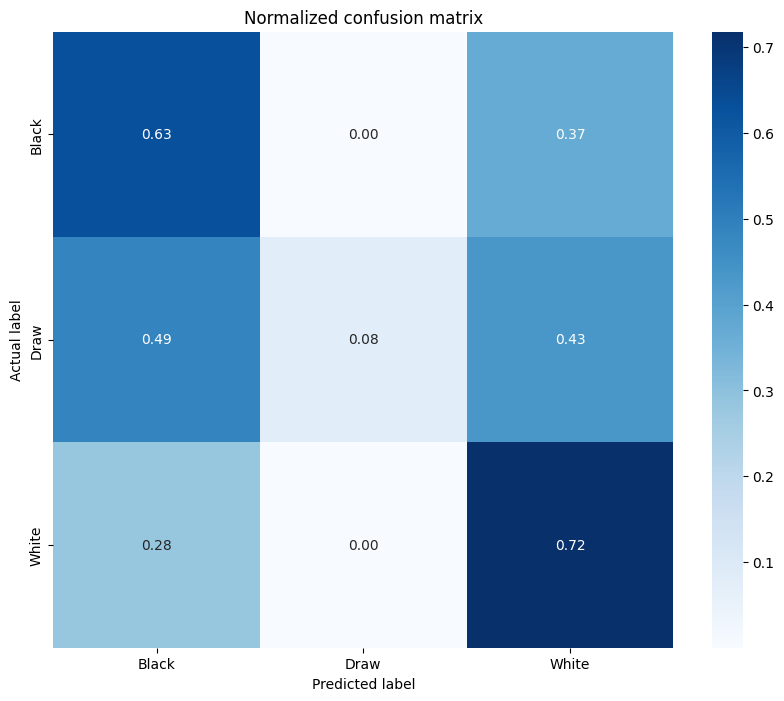

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


# classes should be the list of class names sorted as in the model’s classes_ attribute
plot_confusion_matrix(y_test, y_pred, classes=['Black', 'Draw', 'White'], normalize=True)


Code to develop and print feature importance

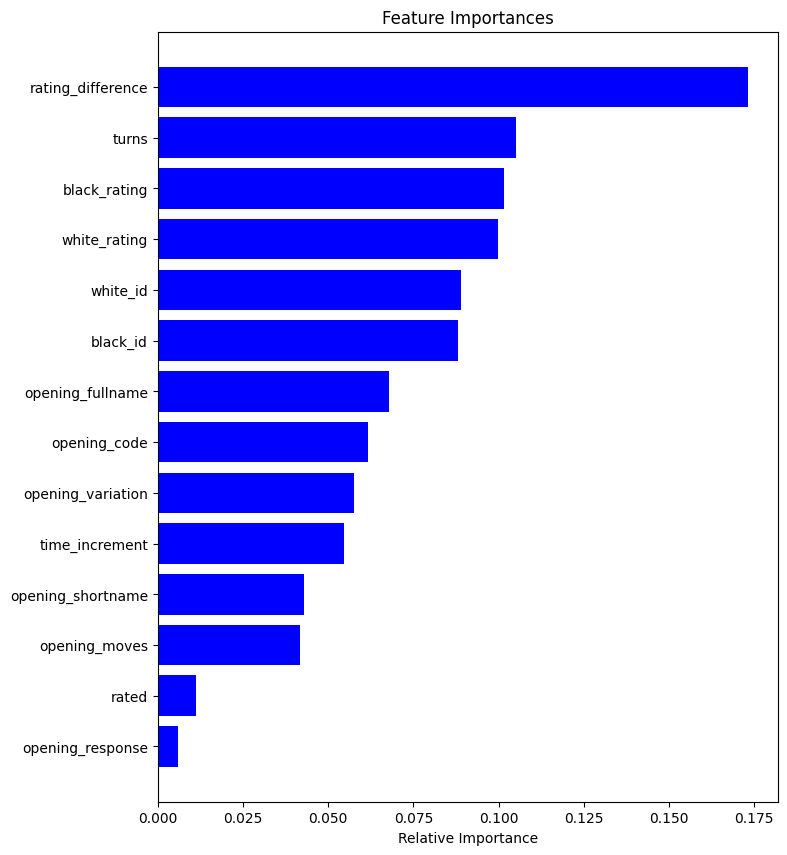

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming this DataFrame creation is done as part of your previous code
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

def plot_feature_importance(importances, feature_names):
    # Ensure importances are passed as a numpy array and not as a DataFrame
    importances = importances.values.flatten()  # Flatten the array if it's multi-dimensional
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# plotting function
plot_feature_importance(feature_importances['importance'], feature_importances.index)


Code to develop and print ROC curve

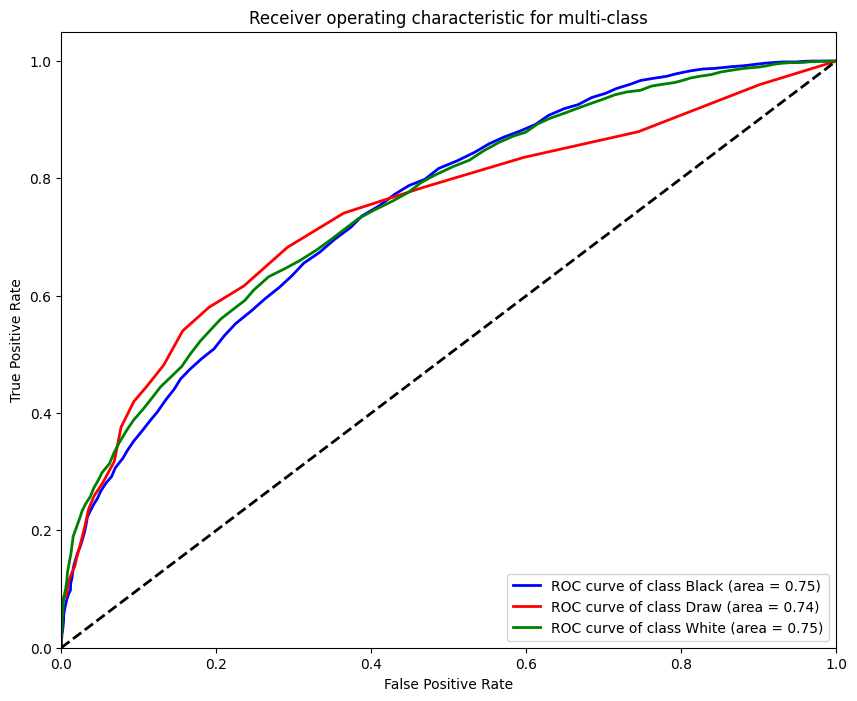

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_test, y_score, classes):
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        if np.sum(y_test_bin[:, i]) == 0:  # Skip classes without positive samples
            continue
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend colors if more classes
    for i, color in enumerate(colors):
        if i in fpr:  # Check if the class had a valid ROC curve to plot
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()


plot_multiclass_roc(y_test, rf.predict_proba(X_test), classes=['Black', 'Draw', 'White'])


# Random Forest Run No. 2

> More Preprocessing - Additionally removed opening_response, rated, opening_code, and opening_shortname. Trained on all other features. Accuracy: 0.652708541043536



In [ ]:
import pandas as pd

# Read the excel file
df = pd.read_excel("/content/chess_games.xlsx")


# Reassigning nulls in specific columns with default values
df['opening_response'].fillna("No Opening Response", inplace=True)
df['opening_variation'].fillna("No Opening Variation", inplace=True)

# Create a new feature for rating difference
df['rating_difference'] = df['white_rating'] - df['black_rating']

# Drop columns that are not needed or could unfairly influence the model training
df = df.drop(['victory_status', 'game_id', 'moves', 'opening_response', 'opening_code', 'rated', 'opening_shortname'], axis=1)

# Convert all object type columns to string for uniformity before any further processing
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype('string')

# Print features, nulls, and data types after preprocessing for verification
print("  --- Feature Count --- ")
df.info()

print(" --- Nulls --- ")
print(df.isnull().sum())

print("  --- Feature Data Types ---  ")
print(df.dtypes)


  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              20058 non-null  int64 
 1   winner             20058 non-null  object
 2   time_increment     20058 non-null  object
 3   white_id           20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_id           20058 non-null  object
 6   black_rating       20058 non-null  int64 
 7   opening_moves      20058 non-null  int64 
 8   opening_fullname   20058 non-null  object
 9   opening_variation  20058 non-null  object
 10  rating_difference  20058 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.7+ MB
 --- Nulls --- 
turns                0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
opening_moves        0
openi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

feature_names = ['rated', 'turns', 'white_rating', 'black_rating', 'opening_moves', 'rating_difference','time_increment', 'white_id', 'black_id',
               'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']

# Preprocessing
# Encode categorical variables using label encoding
label_encoders = {}
for column in ['time_increment', 'white_id', 'black_id',
               'opening_fullname', 'opening_variation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Setting up the features and target variable
X = df.drop(['winner'], axis=1)  # Dropping winner from training set
y = df['winner']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["Black", "Draw", "White"])

# Calculating specificity for each class
specificity_scores = {}
for i, class_label in enumerate(["Black", "Draw", "White"]):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity_scores[class_label] = tn / (tn + fp)

print("Specificity Scores")
print(specificity_scores)

# Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


Accuracy: 0.652708541043536
              precision    recall  f1-score   support

       Black       0.64      0.63      0.64      2719
        Draw       0.88      0.08      0.14       274
       White       0.66      0.72      0.69      3025

    accuracy                           0.65      6018
   macro avg       0.73      0.48      0.49      6018
weighted avg       0.66      0.65      0.64      6018

Specificity Scores
{'Black': 0.7062746286753562, 'Draw': 0.9994777158774373, 'White': 0.6264617440694955}
                   importance
rating_difference    0.186192
turns                0.121229
black_rating         0.110162
white_rating         0.106244
white_id             0.100426
black_id             0.099565
opening_fullname     0.091620
opening_variation    0.072143
time_increment       0.059753
opening_moves        0.052664


Code to develop and print Confusion Matrix

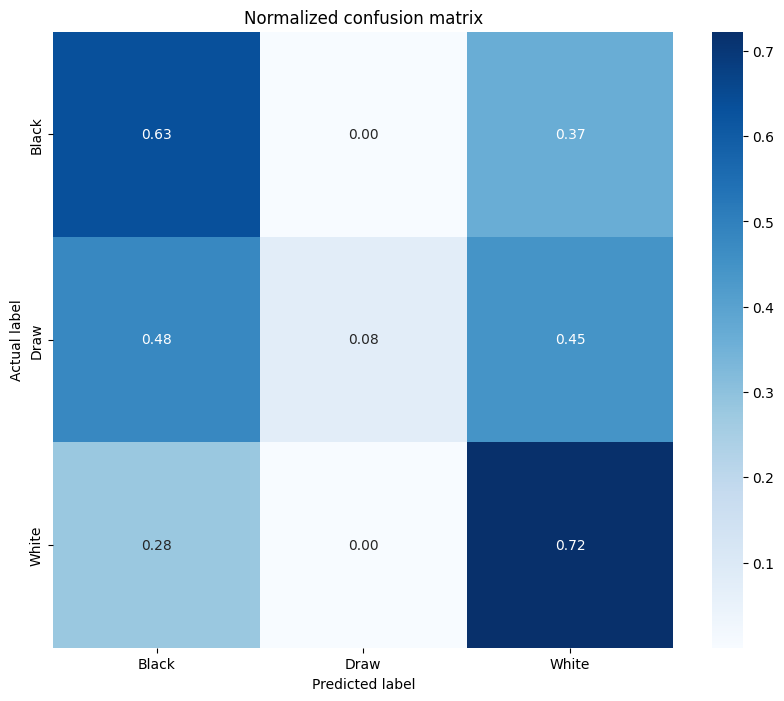

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming y_test and y_pred are available
# classes should be the list of class names sorted as in the model’s classes_ attribute
plot_confusion_matrix(y_test, y_pred, classes=['Black', 'Draw', 'White'], normalize=True)


Code to develop and print Feature Importance

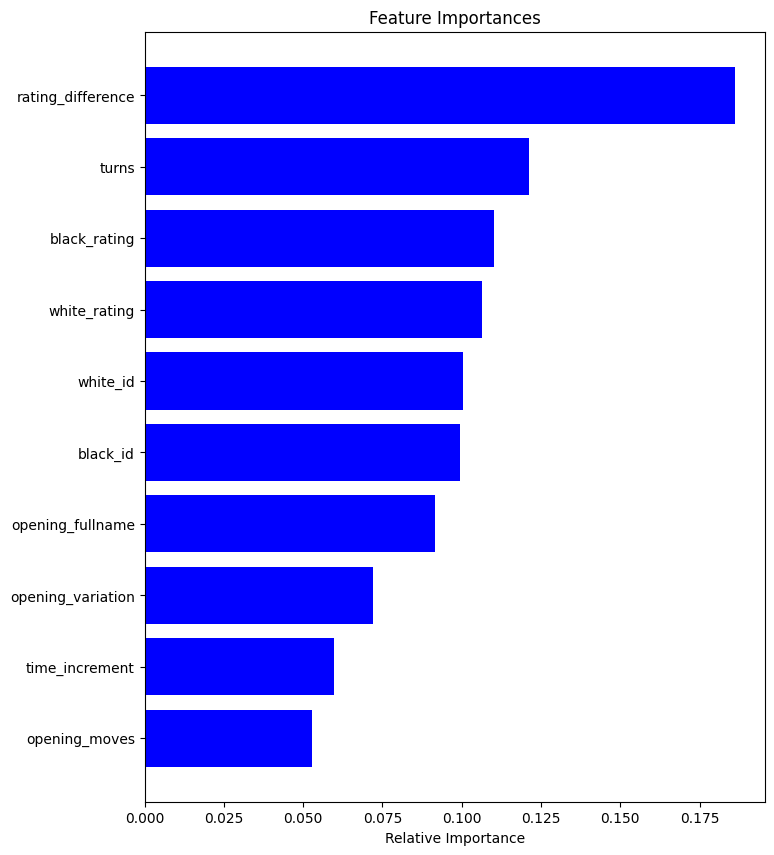

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming this DataFrame creation is done as part of your previous code
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

def plot_feature_importance(importances, feature_names):
    # Ensure importances are passed as a numpy array and not as a DataFrame
    importances = importances.values.flatten()  # Flatten the array if it's multi-dimensional
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Call the plotting function
plot_feature_importance(feature_importances['importance'], feature_importances.index)


Code to develop and print ROC Curve

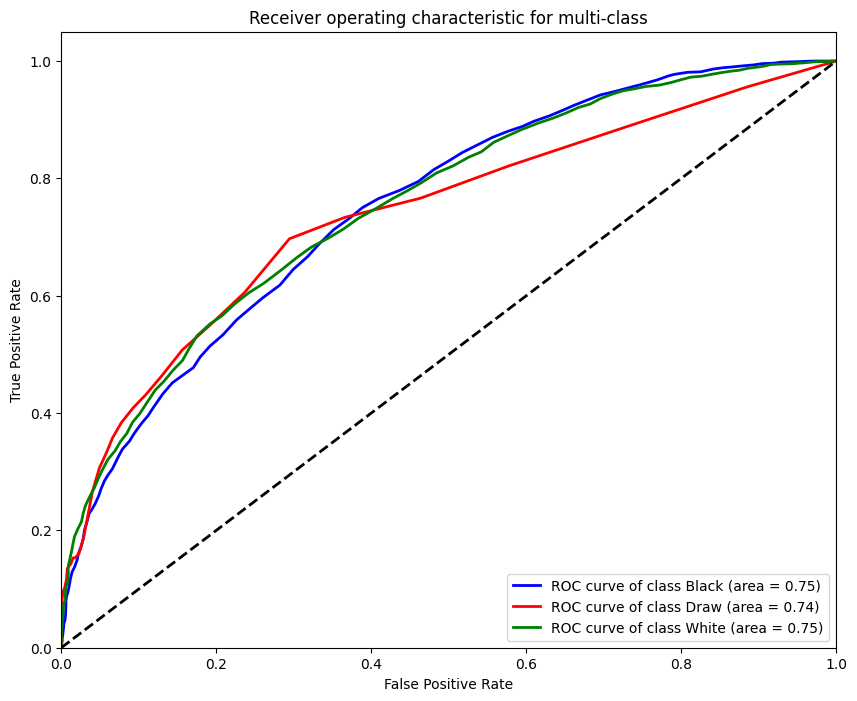

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_test, y_score, classes):
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        if np.sum(y_test_bin[:, i]) == 0:  # Skip classes without positive samples
            continue
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend colors if more classes
    for i, color in enumerate(colors):
        if i in fpr:  # Check if the class had a valid ROC curve to plot
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
plot_multiclass_roc(y_test, rf.predict_proba(X_test), classes=['Black', 'Draw', 'White'])


# Gradient Boosting Run No. 1

>Minimum Preprocessing - Only removed game_id, moves, and winner and trained on all other features. Accuracy: 0.7248255234297108


In [ ]:
import pandas as pd

# Read the excel file
df = pd.read_excel("/content/chess_games.xlsx")
# Reassigning nulls in specific columns with default values
df['opening_response'].fillna("No Opening Response", inplace=True)
df['opening_variation'].fillna("No Opening Variation", inplace=True)

# Create a new feature for rating difference
df['rating_difference'] = df['white_rating'] - df['black_rating']

# Drop columns that are not needed or could unfairly influence the model training
df = df.drop(['victory_status', 'game_id', 'moves'], axis=1)

# Convert all object type columns to string for uniformity before any further processing
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype('string')

# Print features, nulls, and data types after preprocessing for verification
print("  --- Feature Count --- ")
df.info()

print(" --- Nulls --- ")
print(df.isnull().sum())

print("  --- Feature Data Types ---  ")
print(df.dtypes)


  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   winner             20058 non-null  object
 3   time_increment     20058 non-null  object
 4   white_id           20058 non-null  object
 5   white_rating       20058 non-null  int64 
 6   black_id           20058 non-null  object
 7   black_rating       20058 non-null  int64 
 8   opening_code       20058 non-null  object
 9   opening_moves      20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
 12  opening_response   20058 non-null  object
 13  opening_variation  20058 non-null  object
 14  rating_difference  20058 non-null  int64 
dtypes: bool(1), int64(5), object(9)
memory usage: 2.2+ MB
 --- Nul

Code to train and run the model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

feature_names = ['rated', 'turns', 'white_rating', 'black_rating', 'opening_moves', 'rating_difference','time_increment', 'white_id', 'black_id', 'opening_code',
               'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']

label_encoders = {}
for column in ['rated', 'time_increment', 'white_id', 'black_id', 'opening_code',
               'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Setting up the features and target variable
X = df.drop(['winner'], axis=1)  # Ensure that only relevant features are included
y = df['winner']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["Black", "Draw", "White"])

# Calculating specificity for each class
specificity_scores = {}
for i, class_label in enumerate(["Black", "Draw", "White"]):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity_scores[class_label] = tn / (tn + fp)

print("Specificity Scores")
print(specificity_scores)

# Feature Importance
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


Accuracy: 0.7248255234297108
              precision    recall  f1-score   support

       Black       0.72      0.72      0.72      2719
        Draw       0.28      0.02      0.03       274
       White       0.73      0.79      0.76      3025

    accuracy                           0.72      6018
   macro avg       0.58      0.51      0.51      6018
weighted avg       0.71      0.72      0.71      6018

Specificity Scores
{'Black': 0.7668990603213095, 'Draw': 0.9977367688022284, 'White': 0.7079852990310725}
                   importance
turns                0.463877
rating_difference    0.437538
white_id             0.016155
black_rating         0.014111
white_rating         0.013494
opening_code         0.011300
time_increment       0.009121
black_id             0.008977
opening_variation    0.007509
opening_fullname     0.007199
rated                0.005020
opening_moves        0.004021
opening_response     0.001427
opening_shortname    0.000252


Code for confusion matrix - Gradient Boosting

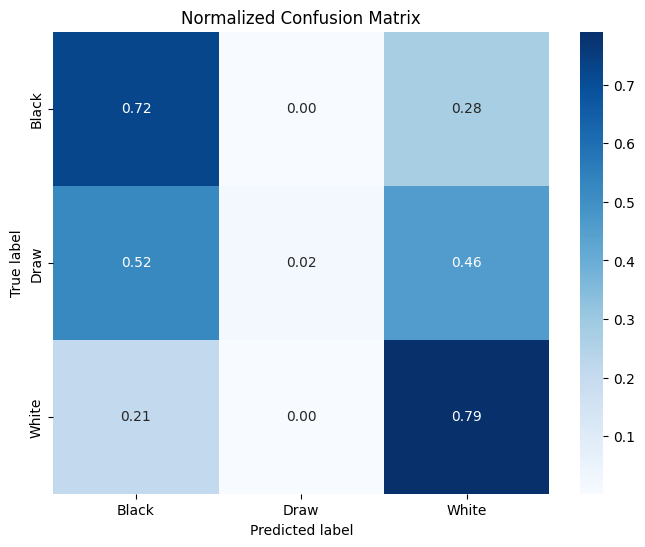

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Classes in your target variable
classes = ['Black', 'Draw', 'White']

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True, title='Normalized Confusion Matrix')


Code for Feature Importance - Gradient Boosting

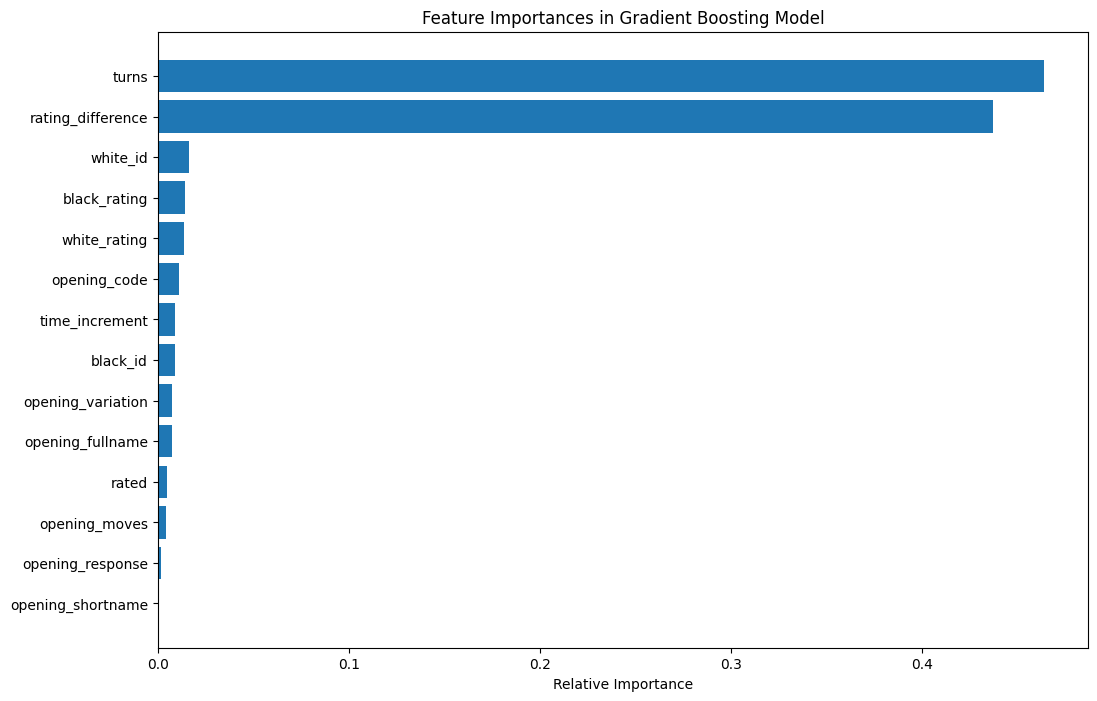

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve feature importances from the model
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index, feature_importances.importance, align='center')
plt.xlabel('Relative Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


Code for ROC Curve - Gradient Boosting

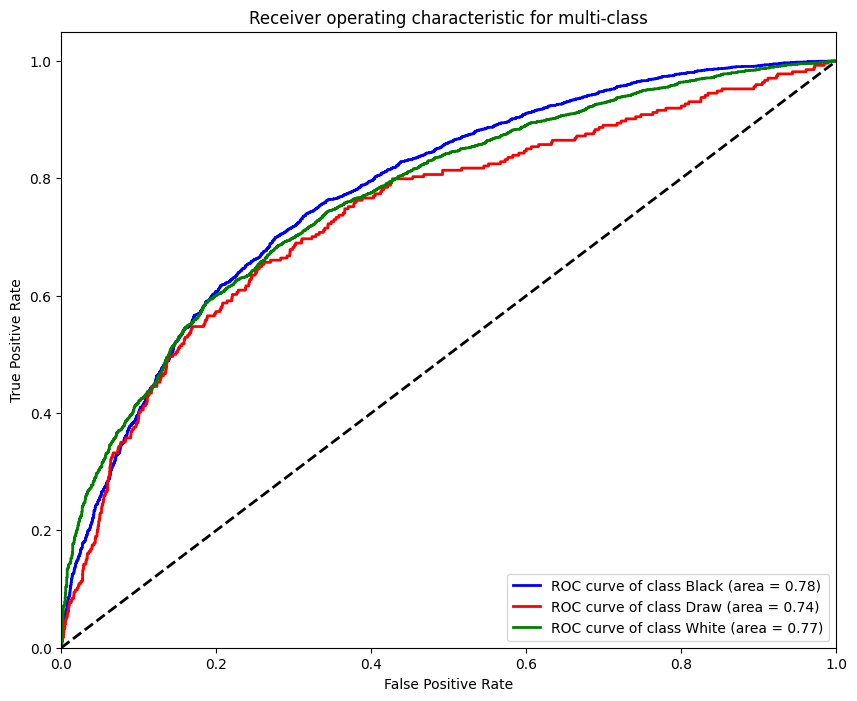

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Assuming df is your DataFrame with data already loaded

# Encode the categorical features using LabelEncoder
label_encoders = {}
categorical_columns = ['rated', 'time_increment', 'white_id', 'black_id', 'opening_code',
                       'opening_fullname', 'opening_shortname', 'opening_response', 'opening_variation']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Binarize the labels for ROC curve plotting
classes = ['Black', 'Draw', 'White']
y = label_binarize(df['winner'], classes=classes)
n_classes = y.shape[1]

# Prepare the features set and split data
X = df[feature_names]  # feature_names includes all your model features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier wrapped in OneVsRestClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ovr = OneVsRestClassifier(gbc)
ovr.fit(X_train, y_train)

# Predict probabilities for each class
y_score = ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']  # Define more colors if there are more classes
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting Run No. 2

>More Preprocessing - Additionally removed opening_response, rated, opening_code, opening_moves, and opening_shortname. Trained on all other features. Accuracy: 0.7241608507809904



In [ ]:
import pandas as pd

# Read the excel file
df = pd.read_excel("/content/chess_games.xlsx")


# Reassigning nulls in specific columns with default values
df['opening_response'].fillna("No Opening Response", inplace=True)
df['opening_variation'].fillna("No Opening Variation", inplace=True)

# Create a new feature for rating difference
df['rating_difference'] = df['white_rating'] - df['black_rating']

# Drop columns that are not needed or could unfairly influence the model training
df = df.drop(['victory_status', 'game_id', 'moves', 'opening_response', 'opening_code', 'opening_moves', 'rated', 'opening_shortname'], axis=1)

# Convert all object type columns to string for uniformity before any further processing
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype('string')

# Print features, nulls, and data types after preprocessing for verification
print("  --- Feature Count --- ")
df.info()

print(" --- Nulls --- ")
print(df.isnull().sum())

print("  --- Feature Data Types ---  ")
print(df.dtypes)


  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              20058 non-null  int64 
 1   winner             20058 non-null  object
 2   time_increment     20058 non-null  object
 3   white_id           20058 non-null  object
 4   white_rating       20058 non-null  int64 
 5   black_id           20058 non-null  object
 6   black_rating       20058 non-null  int64 
 7   opening_fullname   20058 non-null  object
 8   opening_variation  20058 non-null  object
 9   rating_difference  20058 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.5+ MB
 --- Nulls --- 
turns                0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
opening_fullname     0
opening_variation    0
rating_difference    0
dtype:

Code to train and run the model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Your existing feature names
feature_names = ['turns', 'white_rating', 'black_rating', 'rating_difference',
                 'time_increment', 'white_id', 'black_id', 'opening_fullname', 'opening_variation']

# Assuming df is your DataFrame with data already loaded
label_encoders = {}
for column in ['time_increment', 'white_id', 'black_id', 'opening_fullname', 'opening_variation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Setting up the features and target variable
X = df.drop(['winner'], axis=1)  # Ensure that only relevant features are included
y = df['winner']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


Accuracy: 0.7241608507809904
              precision    recall  f1-score   support

       Black       0.72      0.72      0.72      2719
        Draw       0.33      0.02      0.03       274
       White       0.73      0.79      0.76      3025

    accuracy                           0.72      6018
   macro avg       0.59      0.51      0.50      6018
weighted avg       0.71      0.72      0.71      6018

                   importance
turns                0.458755
rating_difference    0.449017
white_id             0.017944
black_rating         0.017353
white_rating         0.015287
time_increment       0.011846
opening_fullname     0.011203
black_id             0.010581
opening_variation    0.008015


Code for confusion matrix - Gradient Boosting

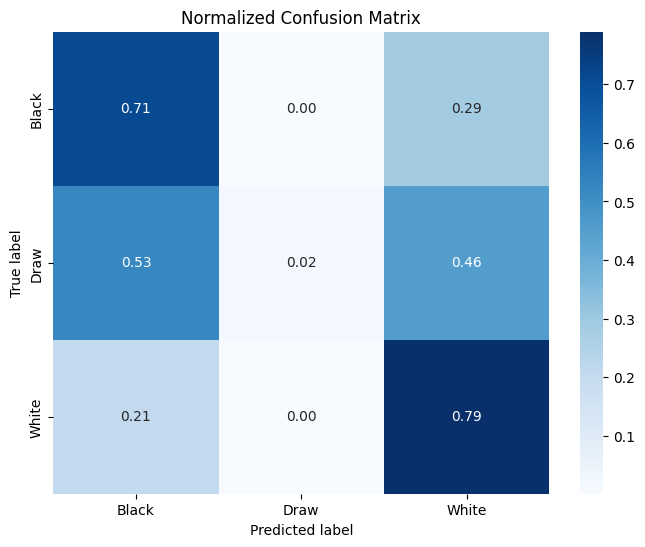

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Classes in your target variable
classes = ['Black', 'Draw', 'White']

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True, title='Normalized Confusion Matrix')


Code for Feature Importance - Gradient Boosting

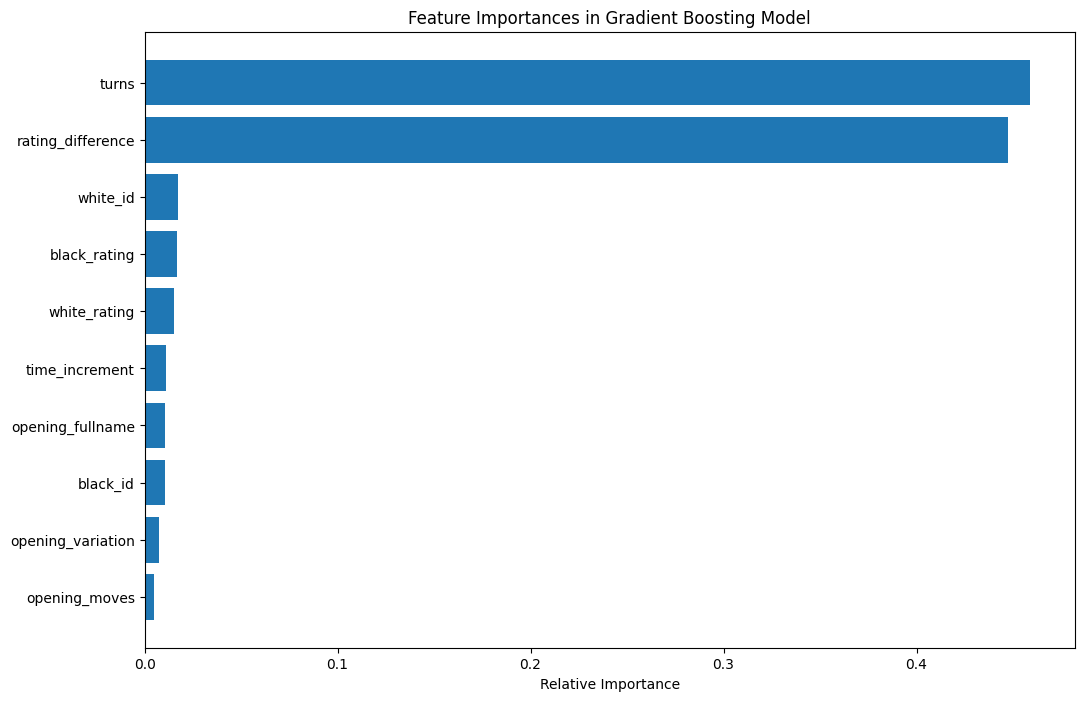

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve feature importances from the model
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index, feature_importances.importance, align='center')
plt.xlabel('Relative Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


Code for ROC Curve - Gradient Boosting

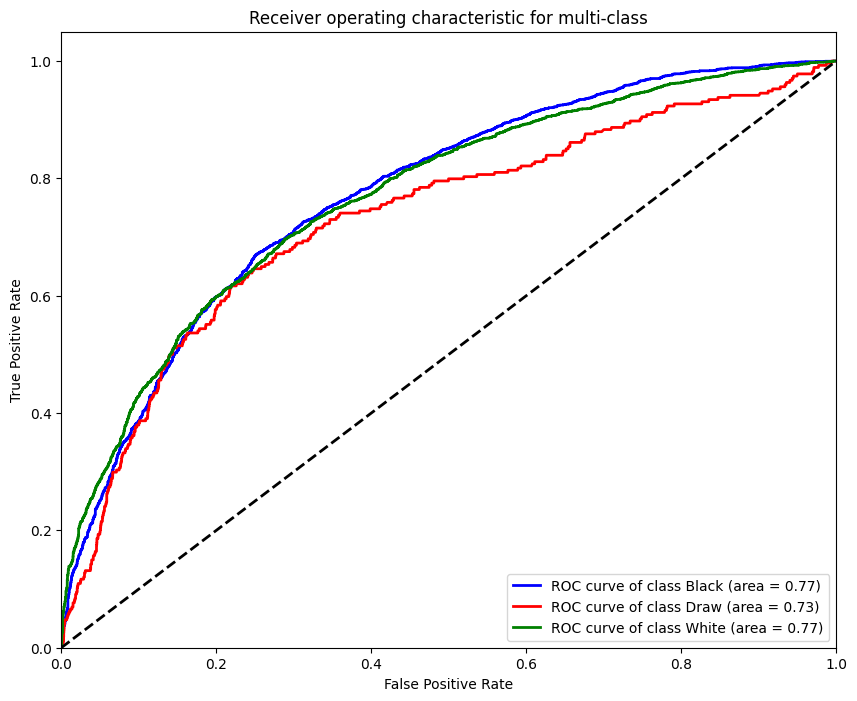

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Encoding categorical features and target variable
label_encoders = {}
for column in ['time_increment', 'white_id', 'black_id', 'opening_fullname', 'opening_variation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Binarize the labels for ROC curve plotting
classes = ['Black', 'Draw', 'White']
y = label_binarize(df['winner'], classes=classes)
n_classes = y.shape[1]

# Splitting the data
X = df.drop('winner', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Gradient Boosting Classifier with OneVsRest
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ovr = OneVsRestClassifier(gbc)
ovr.fit(X_train, y_train)

# Predict probabilities for each class
y_score = ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


# Misc

> Used this section to find summary stats on our dataset



In [ ]:
import pandas as pd

# Read the excel file
df = pd.read_excel("/content/chess_games.xlsx")


# Reassigning nulls in specific columns with default values
df['opening_response'].fillna("No Opening Response", inplace=True)
df['opening_variation'].fillna("No Opening Variation", inplace=True)

# Create a new feature for rating difference
df['rating_difference'] = df['white_rating'] - df['black_rating']


# Convert all object type columns to string for uniformity before any further processing
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).astype('string')

# Print features, nulls, and data types after preprocessing for verification
print("  --- Feature Count --- ")
df.info()

print(" --- Nulls --- ")
print(df.isnull().sum())

print("  --- Feature Data Types ---  ")
print(df.dtypes)

  --- Feature Count --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   20058 non-null  object
 16  opening_variati

In [ ]:
# Calculate the win percentages for White, Black, and Draw.
win_percentages = df['winner'].value_counts(normalize=True) * 100

# Find the most popular opening full name.
most_popular_opening = df['opening_fullname'].mode().iloc[0]

# Find the opening full name with the most wins (excluding draws).
most_common_winning_opening = df[df['winner'].isin(['White', 'Black'])]['opening_fullname'].mode().iloc[0]

# Display the results.
print(f"Win percentages:\n{win_percentages}")
print(f"Most popular opening full name: {most_popular_opening}")
print(f"Most commonly winning opening full name: {most_common_winning_opening}")

Win percentages:
winner
White    49.860405
Black    45.403330
Draw      4.736265
Name: proportion, dtype: float64
Most popular opening full name: Van't Kruijs Opening
Most commonly winning opening full name: Van't Kruijs Opening
